In [59]:
%matplotlib widget 

In [1]:
import numpy as np
from numpy import loadtxt
import pandas as pd
import time
import matplotlib
import matplotlib.pyplot as plt
import pyvisa as visa
from matplotlib import animation
from time import sleep
from matplotlib.animation import FuncAnimation
#Importing the functions from the module and the pulses dictionaries
from Sweeping import *
from Dictionaries import *
from PulseFiles import *
from Instrument import *
import pyqtgraph as pg 
import nidaqmx
import pickle

# Instrument settings and CSV file path Dictionary

In [3]:
M8190A = VisaR(AWG_Settings,60000)

In [4]:
M8190A.query('SYST:ERR?')

'0,"No error"'

In [79]:
Initialization(M8190A,AWG_Settings)

Instruments Sampling Frecuency set to 6.00000000000000E+09Hz
Instruments Direct Out DAC Output route Voltage set to 7.00000000000000E-01Volts
AWG_Settings_Dict set to TRIGGERED Mode
Trigger In threshold value set to 1.00000000000000E+00V


In [5]:
M8190A.write('SEQ:DEL:ALL')

12

In [70]:
location = PulseScheme_A['Measurement file Path']

In [15]:
%matplotlib inline

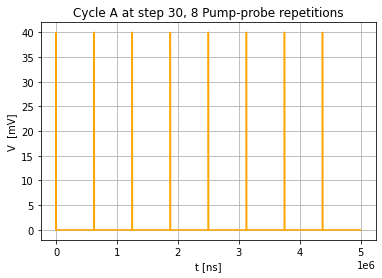

In [21]:
step = 30
pul1 = Sweep_teil(PulseScheme_A,30,step,5000000,sam)


#Plot
fig,ax= plt.subplots()
ax.grid(True)

plt.plot(pul1[1],pul1[0],label= '{b} samples'.format(b = sam),color='orange')

ax.set_ylabel('V  [mV]')
ax.set_xlabel(r't [ns]')
ax.set_title('Cycle A at step {a}, {r} Pump-probe repetitions'.format(a = step, r = PulseScheme_A['Number of repetitions'])) #Voltage Offset = 3mV, Marker Ampl = 50mV 
#ax.legend(loc=0)
#plt.legend(bbox_to_anchor=(2.05, 1), loc='upper left', borderaxespad=0.)
plt.show()
fig.savefig(r'{loc}\Cycle A, Probe width 100nanos.jpeg'.format(loc = location),bbox_inches='tight')

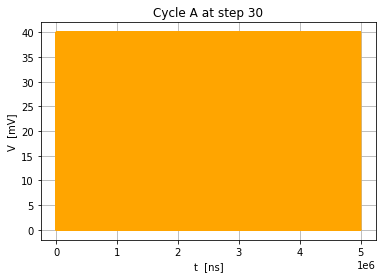

In [41]:
step = 30

pul1 = Sweep_teil(PulseScheme_A,30,step,5000000,sam)

fig,ax= plt.subplots()
ax.grid(True)

#plt.plot(timeMs,dataMs[1]*1000,label= 'Marker Channel {chan}'.format(chan=DAQ_Settings1['Analog Channel Input Marker']),color='purple')
plt.plot(pul1[1],pul1[0],label= '{b} samples'.format(b = sam),color='orange')

ax.set_ylabel('V  [mV]')
ax.set_xlabel('t  [ns]')
ax.set_title('Cycle A at step {a}'.format(a = step)) #Voltage Offset = 3mV, Marker Ampl = 50mV 
#ax.legend(loc=0)
#plt.legend(bbox_to_anchor=(2.05, 1), loc='upper left', borderaxespad=0.)
plt.show()
fig.savefig(r'{loc}\Cycle A {reps} reps.jpeg'.format(loc =location, reps = PulseScheme_A['Number of repetitions']),bbox_inches='tight')

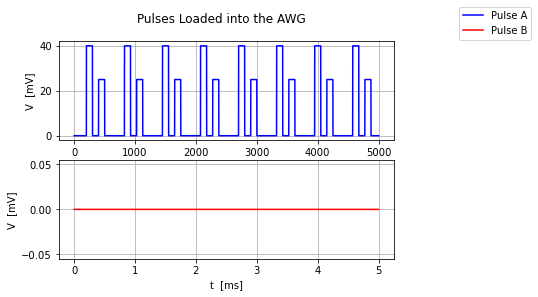

In [26]:
step = 30

#pul1 = Sweep_teil(PulseScheme_AutocorrelationA,30,step,5000,sam)


fig,ax= plt.subplots(2)


ax[0].grid(True)
ax[1].grid(True)
fig.suptitle('Pulses Loaded into the AWG')


ax[0].plot(pul1[1],pul1[0],label= 'Pulse A',color='blue')
ax[1].plot(pul2[1],pul2[0],label= 'Pulse B',color='red')
ax[0].set_ylabel('V  [mV]')
ax[0].set_xlabel(r't  [$\mu$s]')
ax[1].set_ylabel('V  [mV]')
ax[1].set_xlabel(r't  [ms]')

#ax.set_title('Pulses Loaded into the AWG')

fig.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

#fig.savefig('Pulse_scheme_15ms_7500000',optimize=True,bbox_inches='tight')

# Fast Oscilloscope Pulse Reading
- Using picoscope 9341 up to 25 GHz to check the waveform of the pulses loaded to the AWG in the nano regime 

In [4]:
M8190A.write('TRAC:DEL:ALL')
M8190A.write('SEQ:DEL:ALL')

12

In [23]:
sweeping_run_a

{'Pulse File Location, at step 0': 'D:\\Alejandro\\Pulses\\diode measurements\\Pulse Scheme CSV\\Oscilloscope\\100nano\\SegmentA_30000000_0.csv',
 'Pulse File Location, at step 1': 'D:\\Alejandro\\Pulses\\diode measurements\\Pulse Scheme CSV\\Oscilloscope\\100nano\\SegmentA_30000000_1.csv',
 'Pulse File Location, at step 2': 'D:\\Alejandro\\Pulses\\diode measurements\\Pulse Scheme CSV\\Oscilloscope\\100nano\\SegmentA_30000000_2.csv',
 'Pulse File Location, at step 3': 'D:\\Alejandro\\Pulses\\diode measurements\\Pulse Scheme CSV\\Oscilloscope\\100nano\\SegmentA_30000000_3.csv'}

In [5]:
Segment_File(M8190A,'D:\\Alejandro\\Pulses\\diode measurements\\Pulse Scheme CSV\\Measurements\\100nano\\SegmentA_30000000_0.csv',1)


In [ ]:
'D:\\Alejandro\\Pulses\\diode measurements\\Pulse Scheme CSV\\Measurements\\100nano\\SegmentA_30000000_0.csv'

sync mrker channel Amp 50mV,  offset 10mV gives -340 mV while sleep

while triggered it gives 860mV / 840mV

Must be conditional in order to keep it playing! ampl for marker channel with current settings is around 860mV

Segment_File(M8190A,'D:\\Alejandro\\Pulses\\Dict\\S5\\SegmentB_30000000_0.csv',1)

In [2]:
AWG_Settings= {
    'Visa Resource Name': 'TCPIP0::ibn3-036.ibn-net.kfa-juelich.de::hislip0::INSTR',
    'Voltage Amplitude':700,
    'Clock Sample Frecuency':6000000000,
    'Output_Channel': 1,
    'Mode': 'STS',
    'Trigger In Threshold' : 1,
    'Output Rout': 'DAC', #DAC output rout only has the BNC outputs: Direct Out and (Averaged) Direct Out
    'Data Directory': r'D:\Alejandro\Pulses\diode measurements\Pulse Scheme CSV\Oscilloscope'
}

# Pump Dictionaries

In [5]:
Pump = {
    'Name':'Pump',
    'Amplitude':500,
    'Start time':200,
    'End time':2e-10,
    'Start Duration':100,
    'End Duration':60,
    'Sweep time':0,
    'Sweep Duration':0
}

In [6]:
ProbeA = {
    'Name':'ProbeA',
    'Amplitude':350,
    'Start time':0,
    'End time':400,
    'Start Duration':100,
    'End Duration':60,
    'Sweep time':1,
    'Sweep Duration':0
}

In [4]:
ProbeB = {
    'Name':'ProbeB',
    'Amplitude':0,
    'Start time':0,
    'End time':12,
    'Start Duration':1,
    'End Duration':6,
    'Sweep time':0,
    'Sweep Duration':0
}

# Pulse Schemes Dictionaries and measurement path file

In [7]:
PulseScheme_A =  {
    'Name' : 'PulseScheme_A',
    'Pulse Scheme': [Pump,ProbeA],
    'Number of repetitions': 1, #2000 for 100 nano, #60000 for 10 nano #8 for 100micro, #40 for 10micro, 200 for 1 micro  
    'Measurement file Path': r'D:\Alejandro\Pulses\diode measurements\Pulse Scheme CSV\Oscilloscope\1nano'
}

In [52]:
PulseScheme_B  = {
    'Name' : 'PulseScheme_B',
    'Pulse Scheme': [ProbeB,ProbeB],
    'Number of repetitions': 1,
    'Measurement file Path': r'D:\Alejandro\Pulses\diode measurements\Pulse Scheme CSV\Oscilloscope\100micro'
}

In [13]:
6e9*10e-3

60000000.0

In [13]:
1/8e9

1.25e-10

In [9]:
sam = int(6e9*5e-3)

#sam /480

#M8190A.write('FREQ:RAST 6000000000')

In [53]:
sam

30000000

In [28]:
sam/480

12500.0

In [197]:
sam_2 = 200000000

In [10]:
step = 3
modulation_time = 5e9

pul = Sweep_teil(PulseScheme_A,3,step,modulation_time,sam)

In [71]:
pul

(array([0., 0., 0., ..., 0., 0., 0.]),
 array([0.00000000e+00, 1.66666672e-01, 3.33333344e-01, ...,
        4.99999967e+06, 4.99999983e+06, 5.00000000e+06]))

In [31]:
%matplotlib widget 

In [29]:
%matplotlib inline

In [15]:
location = r'D:\Alejandro\Pulses\diode measurements\Pulse Scheme CSV\Oscilloscope\1nano'

In [25]:
step

3

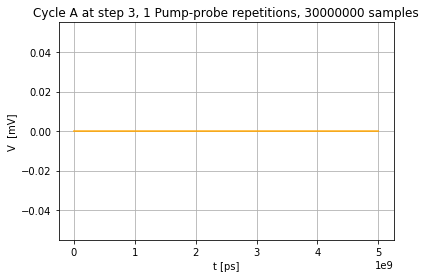

In [11]:
#Plot

fig,ax= plt.subplots()


plt.plot(pul[1],pul[0],label= '{b} samples'.format(b = sam),color='orange')

ax.grid(True)
ax.set_ylabel('V  [mV]')
ax.set_xlabel(r't [ps]')
ax.set_title('Cycle A at step {a}, {r} Pump-probe repetitions, {b} samples'.format(a = step, r = PulseScheme_A['Number of repetitions'], b = sam)) #Voltage Offset = 3mV, Marker Ampl = 50mV 
#ax.legend(loc=0)
#plt.legend(bbox_to_anchor=(2.05, 1), loc='upper left', borderaxespad=0.)
plt.show()


#fig.savefig(r'{loc}\Cycle A, Probe width 1nanos spaced zoom.jpeg'.format(loc = location),bbox_inches='tight')

sync mrker channel Amp 50mV,  offset 10mV gives -340 mV while sleep

while triggered it gives 860mV / 840mV

Must be conditional in order to keep it playing! ampl for marker channel with current settings is around 860mV

Slow Oscilloscope: 

![title](Oscilloscope Screenshots/100micro screen slow.jpg)

Aux settings: 
-amplitude 40mv , offset 10 gives 740mv marker amplitude on, -240mv off

In [29]:
M8190A.write('TRAC:DEL:ALL')

13

In [34]:
Segment_Array(M8190A,1,pul[0],AWG_Settings,1,step)

Current Segment Catalogue is 1,30000000  [(segment id, Segment size)]


('D:\\Alejandro\\Pulses\\diode measurements\\Pulse Scheme CSV\\Oscilloscope\\SegmentA_30000000_3.csv',
            Y1  SyncMarker1  SampleMarker1
 0         0.0            1              1
 1         0.0            1              1
 2         0.0            1              1
 3         0.0            1              1
 4         0.0            1              1
 ...       ...          ...            ...
 29999995  0.0            1              1
 29999996  0.0            1              1
 29999997  0.0            1              1
 29999998  0.0            1              1
 29999999  0.0            1              1
 
 [30000000 rows x 3 columns])

In [19]:
(6e9*1e-3) - (6e9*10e-3)

-54000000.0

In [16]:
(6e9*1e-3)

6000000.0

In [17]:
(6e9*10e-3)

60000000.0

Waveform DAta

# 100micro

In [46]:
voltage_100micro= pd.read_csv(r"D:\Alejandro\Pulses\diode measurements\Pulse Scheme CSV\Oscilloscope\100micro\waveform chopped.txt", names=["Y"])
time_100micro = pd.DataFrame(np.linspace(0,2048,2048),columns=['X'])
waveform_100micro = pd.concat([time_100micro,voltage_100micro],axis=1)

In [47]:
voltage_100micro

,Y
0,0.17364
1,0.17612
2,0.17172
3,0.17848
4,0.17816
...,...
2043,-0.01396
2044,-0.01244
2045,-0.00904
2046,-0.01344


In [54]:
waveform_100micro

,X,Y
0,0.000000,0.17364
1,1.000489,0.17612
2,2.000977,0.17172
3,3.001466,0.17848
4,4.001954,0.17816
...,...,...
2043,2043.998046,-0.01396
2044,2044.998534,-0.01244
2045,2045.999023,-0.00904
2046,2046.999511,-0.01344


In [74]:
%matplotlib inline

In [72]:
PulseScheme_A['Measurement file Path']

'D:\\Alejandro\\Pulses\\diode measurements\\Pulse Scheme CSV\\Oscilloscope\\100micro'

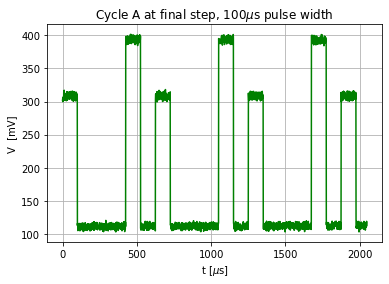

In [75]:
#Plot
fig,ax= plt.subplots()


plt.plot(time_100micro,(voltage_100micro)*1000+128,label= r'Waveform Data 100$\mu$s pulse width',color='green')

ax.grid(True)
ax.set_ylabel('V  [mV]')
ax.set_xlabel(r't [$\mu$s]')
ax.set_title(r'Cycle A at final step, 100$\mu$s pulse width') #Voltage Offset = 3mV, Marker Ampl = 50mV 
#ax.legend(loc=0)
#plt.legend(bbox_to_anchor=(2.05, 1), loc='upper left', borderaxespad=0.)
plt.show()


fig.savefig(r'{loc}\Cycle A, Probe width 100micro.jpeg'.format(loc = location),bbox_inches='tight')

# 10micro

In [2]:
voltage_10micro= pd.read_csv(r"D:\Documentos\STM\Characterization Fast Oscilloscope\10micro\waveformdata10 micro - copia.txt", names=["Y"])
time_10micro = pd.DataFrame(np.linspace(0,2048,2048),columns=['X'])
waveform_10micro = pd.concat([time_10micro,voltage_10micro],axis=1)

In [9]:
%matplotlib widget

In [12]:
location = r'C:\Users\jungl\Documents\GitHub\STM\M8190\Oscilloscope Measurements\Fast Oscilloscope Pulse Width Characterization'

In [44]:
#Plot
fig,ax= plt.subplots()


plt.plot(time_10micro/2,(voltage_10micro)*1000+128,label= r'Waveform Data 10$\mu$s pulse width',color='green')

ax.grid(True)
ax.set_ylabel('V  [mV]')
ax.set_xlabel(r't [$\mu$s]')
ax.set_title(r'Cycle A at final step, 10$\mu$s pulse width') #Voltage Offset = 3mV, Marker Ampl = 50mV 
#ax.legend(loc=0)
#plt.legend(bbox_to_anchor=(2.05, 1), loc='upper left', borderaxespad=0.)
plt.show()


#fig.savefig(r'{loc}\Cycle A, Probe width 10micro.jpeg'.format(loc = location))

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

# 1micro

In [14]:
voltage_1micro= pd.read_csv(r"D:\Documentos\STM\Characterization Fast Oscilloscope\1micro\waveformdata1 micro - copia.txt", names=["Y"])
time_1micro = pd.DataFrame(np.linspace(0,2048,2048),columns=['X'])
waveform_1micro = pd.concat([time_10micro,voltage_10micro],axis=1)

In [22]:
%matplotlib widget

In [12]:
location = r'C:\Users\jungl\Documents\GitHub\STM\M8190\Oscilloscope Measurements\Fast Oscilloscope Pulse Width Characterization'

In [77]:
#Plot
fig,ax= plt.subplots()


plt.plot(time_1micro/20,(voltage_1micro)*1000+128,label= r'Waveform Data 1$\mu$s pulse width',color='green')

ax.grid(True)
ax.set_ylabel('V  [mV]')
ax.set_xlabel(r't [$\mu$s]')
ax.set_title(r'Cycle A at final step, 1$\mu$s pulse width') #Voltage Offset = 3mV, Marker Ampl = 50mV 
#ax.legend(loc=0)
#plt.legend(bbox_to_anchor=(2.05, 1), loc='upper left', borderaxespad=0.)
plt.show()


#fig.savefig(r'{loc}\Cycle A, Probe width 1micro.jpeg'.format(loc = location))

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

# 100 nano

In [27]:
voltage_100nano= pd.read_csv(r"D:\Documentos\STM\Characterization Fast Oscilloscope\100nano\waveformdata100 nano - copia.txt", names=["Y"])
time_100nano = pd.DataFrame(np.linspace(0,2048,2048),columns=['X'])
waveform_100nano = pd.concat([time_100nano,voltage_100nano],axis=1)

In [47]:
%matplotlib inline

In [49]:
%matplotlib widget

In [12]:
location = r'C:\Users\jungl\Documents\GitHub\STM\M8190\Oscilloscope Measurements\Fast Oscilloscope Pulse Width Characterization'

In [68]:
#Plot
fig,ax= plt.subplots()


plt.plot(time_100nano*5,(voltage_100nano)*1000+128,label= r'Waveform Data 100ns pulse width',color='green')

ax.grid(True)
ax.set_ylabel('V  [mV]')
ax.set_xlabel(r't [ns]')
ax.set_title(r'Cycle A at final step, 100ns pulse width') #Voltage Offset = 3mV, Marker Ampl = 50mV 
#ax.legend(loc=0)
#plt.legend(bbox_to_anchor=(2.05, 1), loc='upper left', borderaxespad=0.)
plt.show()


fig.savefig(r'{loc}\Cycle A, Probe width 100nano.jpeg'.format(loc = location))

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

# 10 nano

In [50]:
voltage_10nano= pd.read_csv(r"D:\Documentos\STM\Characterization Fast Oscilloscope\10nano\waveformdata10 nano - copia.txt", names=["Y"])
time_10nano = pd.DataFrame(np.linspace(0,2048,2048),columns=['X'])
waveform_10nano = pd.concat([time_10nano,voltage_10nano],axis=1)

In [63]:
%matplotlib inline

In [65]:
%matplotlib widget

In [12]:
location = r'C:\Users\jungl\Documents\GitHub\STM\M8190\Oscilloscope Measurements\Fast Oscilloscope Pulse Width Characterization'

In [79]:
#Plot
fig,ax= plt.subplots()


plt.plot(time_10nano/10,(voltage_10nano)*1000+128,label= r'Waveform Data 10ns pulse width',color='green')

ax.grid(True)
ax.set_ylabel('V  [mV]')
ax.set_xlabel(r't [ns]')
ax.set_title(r'Cycle A at final step, 10ns pulse width') #Voltage Offset = 3mV, Marker Ampl = 50mV 
#ax.legend(loc=0)
#plt.legend(bbox_to_anchor=(2.05, 1), loc='upper left', borderaxespad=0.)
plt.show()


fig.savefig(r'{loc}\Cycle A, Probe width 10nano.jpeg'.format(loc = location))

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

# 1 nano

In [69]:
voltage_1nano= pd.read_csv(r"D:\Documentos\STM\Characterization Fast Oscilloscope\1nano\waveformdata1 nano better  2 - copia.txt", names=["Y"])
time_1nano = pd.DataFrame(np.linspace(0,2048,2048),columns=['X'])
waveform_1nano = pd.concat([time_1nano,voltage_1nano],axis=1)

In [63]:
%matplotlib inline

In [65]:
%matplotlib widget

In [12]:
location = r'C:\Users\jungl\Documents\GitHub\STM\M8190\Oscilloscope Measurements\Fast Oscilloscope Pulse Width Characterization'

In [76]:
#Plot
fig,ax= plt.subplots()


plt.plot(time_1nano/20,(voltage_1nano)*1000+128,label= r'Waveform Data 1ns pulse width',color='green')

ax.grid(True)
ax.set_ylabel('V  [mV]')
ax.set_xlabel(r't [ns]')
ax.set_title(r'Cycle A at final step, 1ns pulse width') #Voltage Offset = 3mV, Marker Ampl = 50mV 
#ax.legend(loc=0)
#plt.legend(bbox_to_anchor=(2.05, 1), loc='upper left', borderaxespad=0.)
plt.show()


fig.savefig(r'{loc}\Cycle A, Probe width 1nano.jpeg'.format(loc = location))

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …